In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
color = sns.color_palette()
train = pd.read_csv("../input/train.csv")

# General info

In [2]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,1300000.0,...,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
print(train.shape)

(4459, 4993)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [5]:
train.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,1.552158e+05,1.950500e+05,8.522090,3.595874e+03,2.258015e+06,2.680843e+05,4.588255e+04,4.451478e+04,3.968961e+05,2.883129e+04,1.940794e+03,4.483841e+05,7.989729e+04,1.548394e+05,1.128254e+05,1.148329e+05,3.377439e+03,0.0,3.794130e+05,1.202247e+05,7.426464e+05,4.994842e+03,1.725258e+06,1.941882e+05,0.0,9.338327e+04,6.296896e+05,0.0,1.249545e+06,1.200042e+06,...,2.412200e+03,3.767589e+05,6.669478e+05,4.281949e+04,6.279435,1.409112e+05,2.364780e+05,7.627485e+05,6.752640e+05,5.428654e+05,7.776979e+05,1.004851e+05,3.825025e+05,2.539583e+03,3.767661e+03,4.153891e+04,7.041224e+04,9.648562e+04,9.751240e+05,2.910967e+04,7.599802e+04,3.588248e+03,1.796016e+05,5.302810e+05,2.377396e+05,1.183135e+06,1.247793e+06,9.867683e+02,6.165015e+04,1.289495e+05,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,1.587815e+06,2.397372e+06,569.068911,1.245435e+05,1.552298e+07,3.026910e+06,8.140674e+05,1.354504e+06,3.238243e+06,5.705388e+05,2.786022e+04,6.370644e+06,2.846440e+06,2.425794e+06,1.161275e+06,2.747535e+06,1.313839e+05,0.0,3.561409e+06,4.867503e+06,3.799941e+06,1.868664e+05,9.034308e+06,1.481349e+06,0.0,8.547764e+05,6.956380e+06,0.0,7.361173e+06,8.113234e+06,...,1.498586e+05,7.755051e+06,6.261373e+06,5.473370e+05,322.557139,2.052878e+06,1.533062e+06,5.816722e+06,7.444468e+06,4.250172e+06,4.287643e+06,9.150068e+05,2.799848e+06,1.508683e+05,2.515884e+05,1.179500e+06,2.810830e+06,1.114863e+06,9.750283e+06,7.912064e+05,1.206581e+06,2.396080e+05,1.660884e+06,4.497567e+06,4.109065e+06,1.139493e+07,6.878895e+06,6.589219e+04,2.124731e+06,1.335938e+06,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

Some features are filled with zeros

In [6]:
sum(train.isnull().sum())

0

# Target

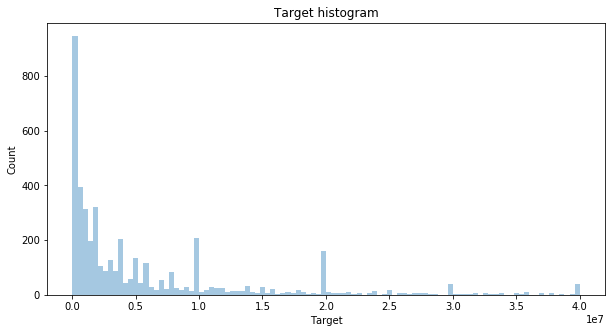

In [7]:
plt.figure(figsize = (10, 5))
sns.distplot(train["target"], bins = 100, kde = False)
plt.title("Target histogram")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

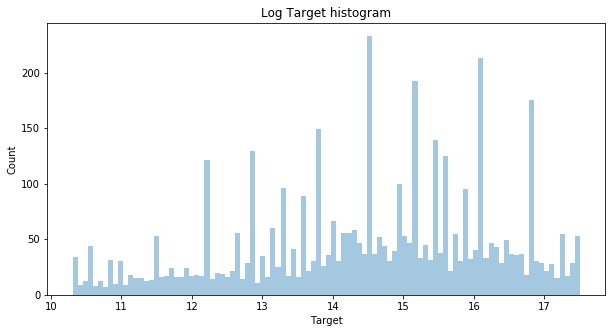

In [8]:
plt.figure(figsize = (10, 5))
sns.distplot(np.log(1 + train["target"]), bins = 100, kde = False)
plt.title("Log Target histogram")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

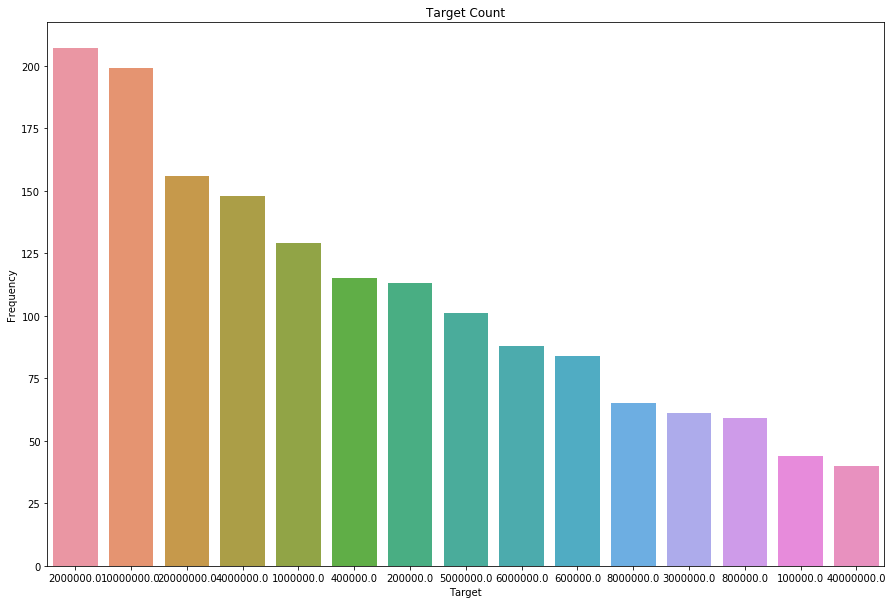

In [9]:
target_count = train["target"].value_counts()
order = target_count.index[:15]
plt.figure(figsize = (15, 10))
sns.barplot(target_count.index[:15], target_count.values[:15], order = order)
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Target Count")
plt.show()

### A glance of first ten features

In [10]:
columns = train.columns
partial_train = train[columns[2:12]]
partial_train.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0


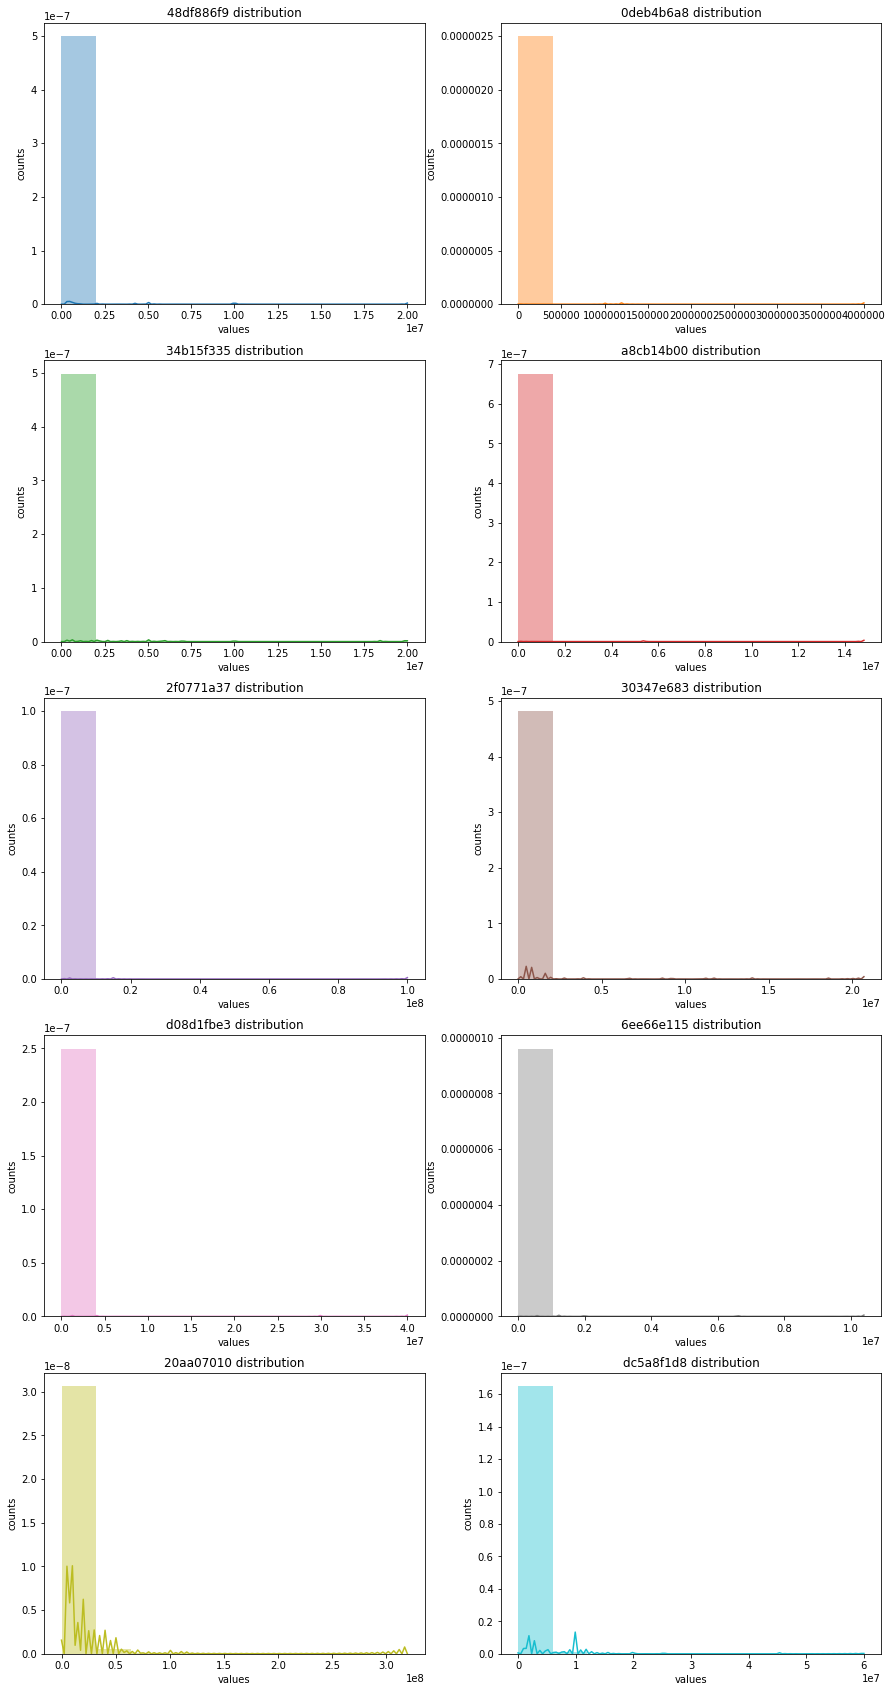

In [11]:
fig, ax = plt.subplots(5, 2, figsize = (15, 30))
for c in range(partial_train.shape[1]):
    sns.distplot(partial_train[partial_train.columns[c]], color = color[c], ax = ax[int(c/2)][c%2], bins = 10)
    ax[int(c/2)][c%2].set_xlabel("values")
    ax[int(c/2)][c%2].set_ylabel("counts")
    ax[int(c/2)][c%2].set_title(partial_train.columns[c] + " distribution")
plt.show()

# Features

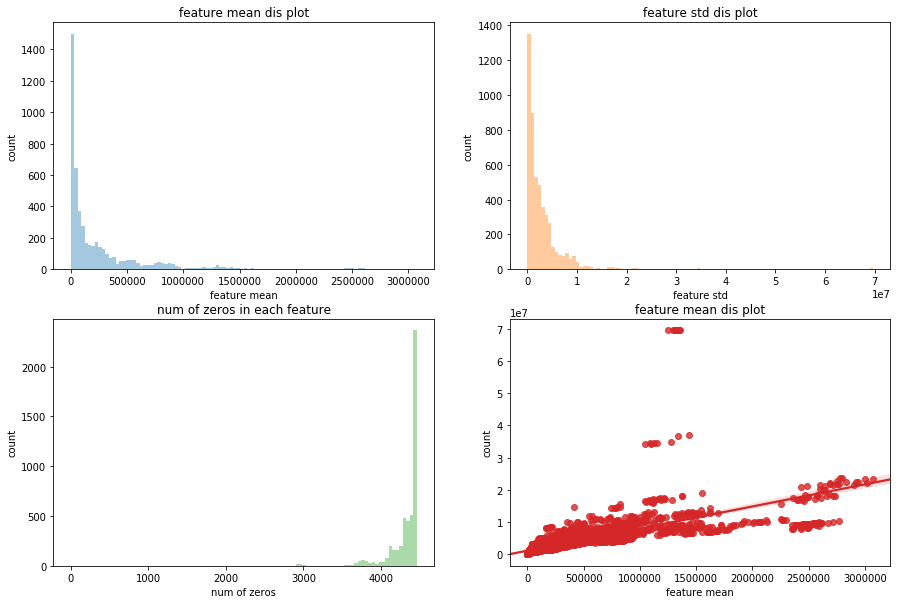

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.distplot(np.mean(train.iloc[:, 2:]), bins = 100, kde = False, color = color[0], ax = ax[0][0])
ax[0][0].set_xlabel("feature mean")
ax[0][0].set_ylabel("count")
ax[0][0].set_title("feature mean dis plot")

sns.distplot(np.std(train.iloc[:, 2:]), bins = 100, kde = False, color = color[1], ax = ax[0][1])
ax[0][1].set_xlabel("feature std")
ax[0][1].set_ylabel("count")
ax[0][1].set_title("feature std dis plot")

sns.distplot(pd.DataFrame([sum(train[c] == 0) for c in train.columns]), bins = 100, color = color[2], kde = False, ax = ax[1][0])
ax[1][0].set_xlabel("num of zeros")
ax[1][0].set_ylabel("count")
ax[1][0].set_title("num of zeros in each feature")

sns.regplot(np.mean(train.iloc[:, 2:]), np.std(train.iloc[:, 2:]), color = color[3], ax = ax[1][1])
ax[1][1].set_xlabel("feature mean")
ax[1][1].set_ylabel("count")
ax[1][1].set_title("feature mean dis plot")
plt.show()

# Features vs Target

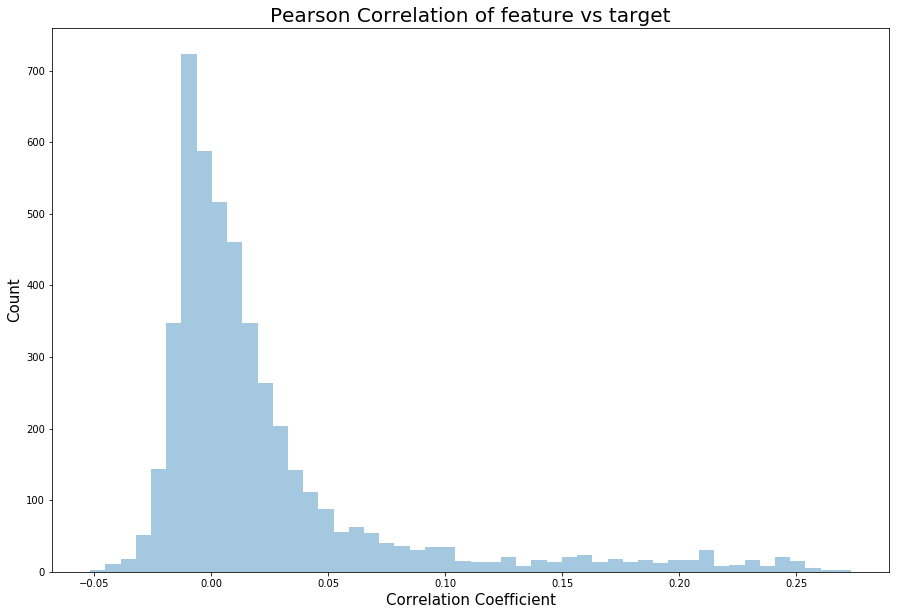

In [13]:
columns = list(train.columns)
plt.figure(figsize = (15, 10))
sns.distplot(pd.DataFrame([train["target"].corr(train[c]) for c in columns[2:]]).dropna(), kde = False)
plt.xlabel("Correlation Coefficient", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Pearson Correlation of feature vs target", fontsize = 20)
plt.show()

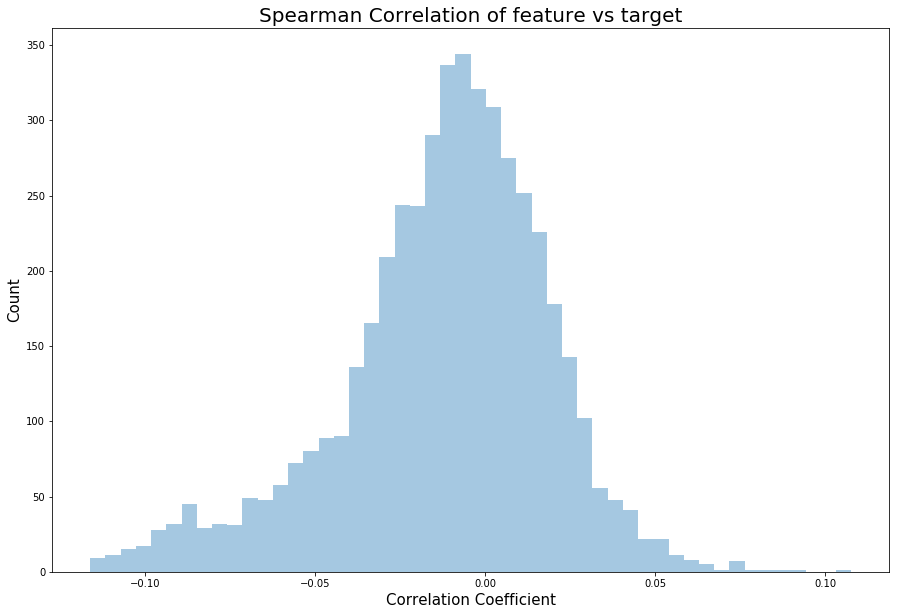

In [14]:
plt.figure(figsize = (15, 10))
sns.distplot(pd.DataFrame([train["target"].corr(train[c], method = "spearman") for c in columns[2:]]).dropna(), kde = False)
plt.xlabel("Correlation Coefficient", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Spearman Correlation of feature vs target", fontsize = 20)
plt.show()

In [15]:
pearson_corr = pd.DataFrame(([c, train["target"].corr(train[c])] for c in columns[2:]), columns = ["feature", "corr"]).dropna().sort_values("corr", ascending = False)
pearson_corr.head()

,feature,corr
4716,555f18bd3,0.273379
2755,9fd594eec,0.270019
2462,5bc7ab64f,0.267858
3513,cbbc9c431,0.265005
4358,f190486d6,0.263821


### Positive Pearson corelation 

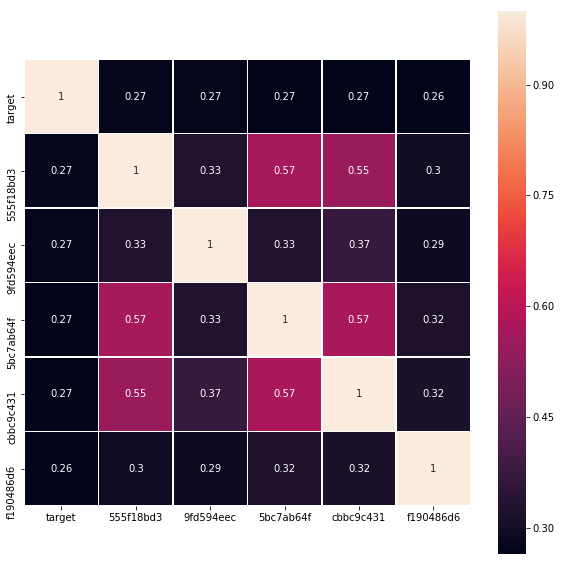

In [16]:
plt.figure(figsize = (10, 10))
sns.heatmap(train[["target"] + list(pearson_corr["feature"][:5])].corr(), annot = True, square = True, linewidth = 0.5)
plt.show()

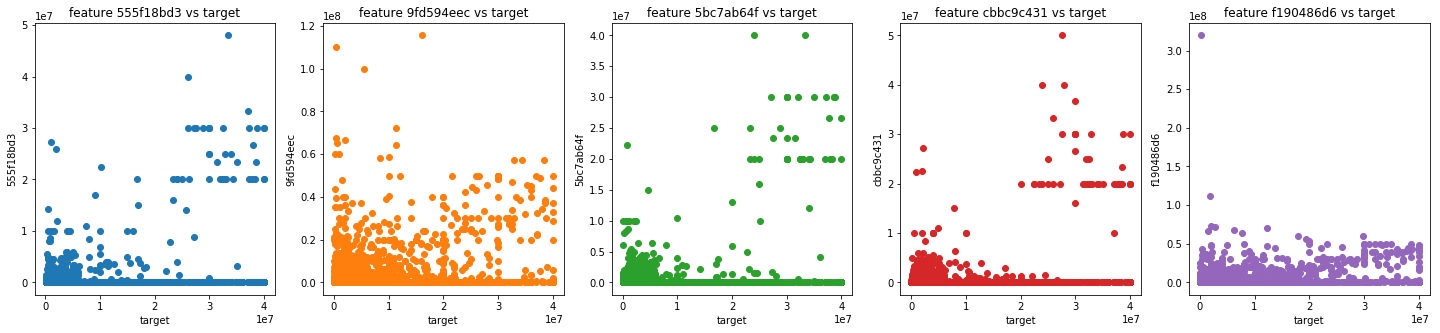

In [17]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i, f in enumerate(pearson_corr["feature"][:5]):
    ax[i].scatter(train["target"], train[f], color = color[i])
    ax[i].set_xlabel("target")
    ax[i].set_ylabel(f)
    ax[i].set_title("feature " + f + " vs target")
plt.show()

### Negative Pearson Corelation

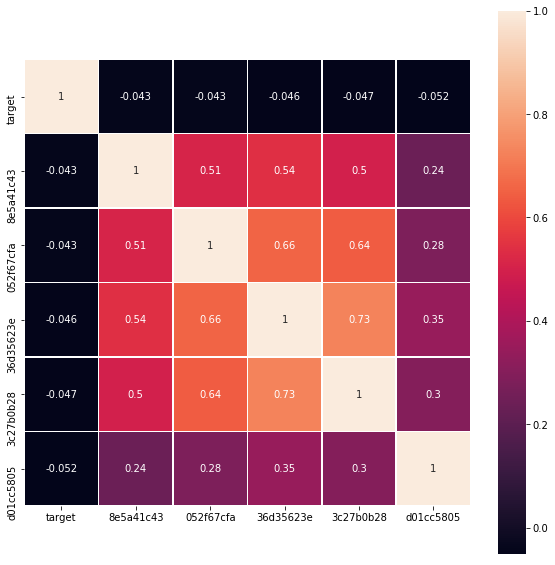

In [18]:
plt.figure(figsize = (10, 10))
sns.heatmap(train[["target"] + list(pearson_corr["feature"][-5:])].corr(), annot = True, square = True, linewidth = 0.5)
plt.show()

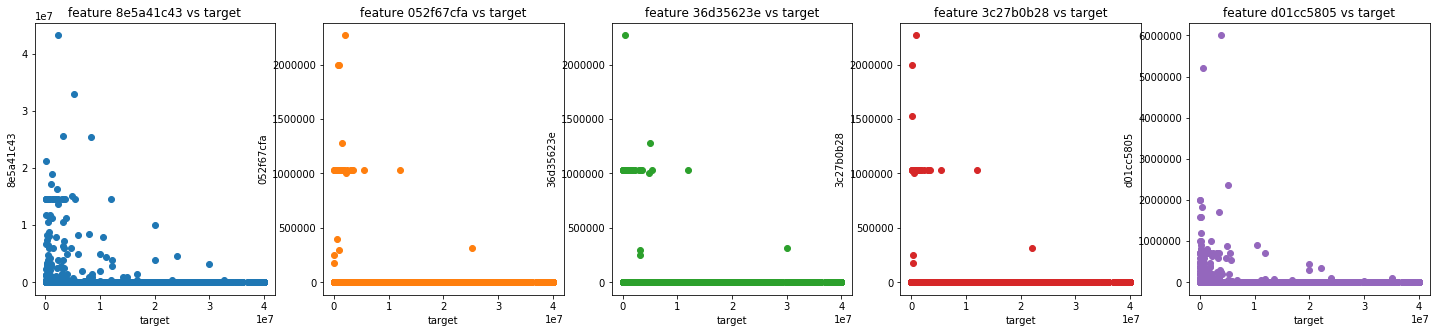

In [19]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i, f in enumerate(pearson_corr["feature"][-5:]):
    ax[i].scatter(train["target"], train[f], color = color[i])
    ax[i].set_xlabel("target")
    ax[i].set_ylabel(f)
    ax[i].set_title("feature " + f + " vs target")
plt.show()

## Unique nums in each features

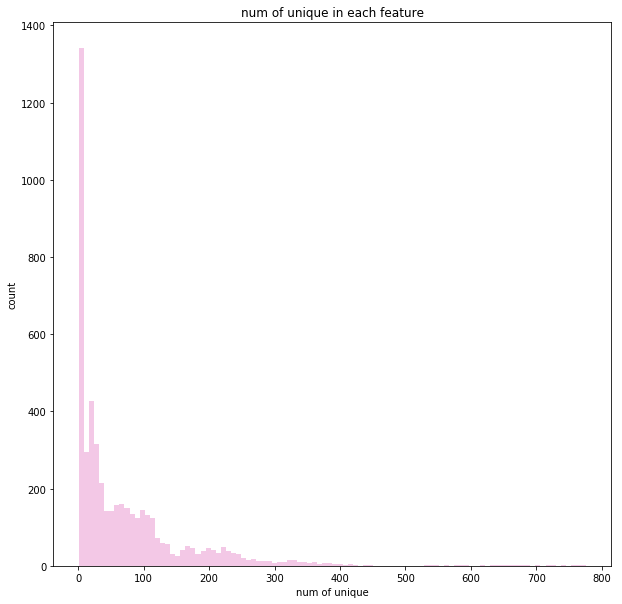

In [20]:
unique_num_in_feat = pd.DataFrame(([c, train[c].nunique()] for c in train.columns[2:]), columns = ["feat", "num_unique"])
plt.figure(figsize = (10, 10))
sns.distplot(unique_num_in_feat["num_unique"], bins = 100, color = color[6], kde = False)
plt.xlabel("num of unique")
plt.ylabel("count")
plt.title("num of unique in each feature")
plt.show()

In [21]:
target_num_unique = train.nunique()
unique_num_in_feat[unique_num_in_feat["num_unique"] > 500]

,feat,num_unique
8,20aa07010,714
118,963a49cdc,597
562,26fc93eb7,616
572,0572565c2,530
594,66ace2992,629
658,fb49e4212,639
678,6619d81fc,564
878,6eef030c1,721
908,fc99f9426,551
1427,1db387535,562


In [22]:
train[unique_num_in_feat[unique_num_in_feat["num_unique"] > 500]["feat"][1:]].describe()

,963a49cdc,26fc93eb7,0572565c2,66ace2992,fb49e4212,6619d81fc,6eef030c1,fc99f9426,1db387535,b43a7cfd5,024c577b9,2ec5b290f,0ff32eb98,58e056e12,241f0f867,1931ccfdd,58e2e02e6,9fd594eec,fb0f5dbfe,91f701ba2,703885424,eeb9cd3aa,324921c7b,58232a6fb,491b9ee45,d6bb78916,70feb1494,adb64ff71,62e59a501,15ace8c9f,5c6487af1,f190486d6,f74e8f13d,c5a231d81,e176a204a,1702b5bf0,190db8488,c47340d97,23310aa6f
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,2.409617e+06,2.349409e+06,2.584132e+06,2.496765e+06,2.432275e+06,2.552375e+06,2.358791e+06,2.507031e+06,2.517852e+06,2.386142e+06,2.348703e+06,2.437491e+06,2.773603e+06,2.383207e+06,2.459386e+06,2.541157e+06,2.551525e+06,2.434850e+06,2.539556e+06,2.668947e+06,2.542138e+06,2.507452e+06,2.587932e+06,2.488621e+06,2.618989e+06,2.384967e+06,2.494192e+06,2.595256e+06,2.492576e+06,2.470806e+06,2.426307e+06,2.565014e+06,2.360987e+06,2.720953e+06,2.558071e+06,2.487566e+06,2.570939e+06,2.612217e+06,2.586191e+06
std,9.125827e+06,7.815630e+06,9.639047e+06,9.204054e+06,8.105497e+06,9.600044e+06,7.641190e+06,8.428103e+06,9.410879e+06,9.017169e+06,9.040701e+06,9.264867e+06,1.013819e+07,9.015494e+06,9.436517e+06,9.596845e+06,9.272155e+06,7.677383e+06,9.296761e+06,9.673888e+06,9.504374e+06,9.071633e+06,8.644926e+06,9.244475e+06,9.687036e+06,9.051715e+06,7.989722e+06,9.902053e+06,9.205949e+06,9.363648e+06,9.132936e+06,8.906709e+06,7.940644e+06,1.005142e+07,9.646328e+06,8.193370e+06,9.677067e+06,9.641274e+06,9.600492e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.233333e+05,5.000000e+05,5.500000e+05,5.516667e+05,4.850000e+05,5.510000e+05,5.260000e+05,5.350000e+05,5.500000e+05,4.000000e+05,4.067500e+05,4.575000e+05,6.000000e+05,4.600000e+05,4.350000e+05,5.220000e+05,6.820000e+05,7.000000e+05,5.666667e+05,6.733333e+05,5.260000e+05,6.000000e+05,5.260000e+05,5.000000e+05,5.405000e+05,4.000000e+05,5.633333e+05,5.500000e+05,5.000000e+05,5.633333e+05,5.260000e+05,7.165000e+05,5.000000e+05,6.000000e+05,5.500000e+05,5.500000e+05,5.260000e+05,5.573333e+05,5.530000e+05
max,3.196120e+08,1.155380e+08

# Test Data

In [23]:
test = pd.read_csv("../input/test.csv")

In [24]:
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.528249e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,20884000.0,0.0,0.0,0.0,0.0,0.0,36252000.0,0.0,20000000.0,0.0,...,0.0,0.0,25010000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test.describe()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,...,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04
mean,5.773787e+04,6.258726e+04,1.036752e+05,6.289853e+04,6.713354e+04,8.083879e+04,6.181014e+04,5.515752e+04,1.406324e+06,8.128668e+04,9.776890e+04,8.795078e+04,6.614901e+04,1.370504e+06,1.239875e+05,9.283485e+04,6.694284e+04,1.463359e+05,9.791483e+04,5.627809e+04,2.385508e+05,8.536992e+04,1.625938e+05,1.100071e+05,1.018217e+05,6.282506e+04,6.274862e+04,1.482892e+05,7.480384e+04,3.975680e+05,6.586698e+04,3.622145e+05,1.692474e+05,6.626668e+04,1.201240e+05,2.032910e+05,1.310807e+05,7.417365e+05,6.674578e+05,1.195456e+05,...,5.994782e+04,1.177790e+05,3.911007e+05,1.049548e+05,7.287958e+04,1.881257e+05,1.743099e+05,3.333368e+05,2.145907e+05,1.232455e+05,4.342922e+05,1.105138e+05,2.097818e+05,8.325504e+04,8.843721e+04,8.962888e+04,5.683157e+04,1.132851e+05,5.732891e+05,7.699798e+04,8.990832e+04,7.162684e+04,1.445701e+05,1.210559e+05,2.635554e+05,2.941441e+05,6.896508e+05,7.689320e+04,1.334015e+05,1.144893e+05,1.193910e+05,1.355955e+05,3.242217e+05,1.437856e+05,9.302367e+04,8.047145e+04,6.076865e+04,1.323210e+05,1.675766e+05,1.282487e+05
std,1.745182e+06,2.322787e+06,2.586951e+06,2.765941e+06,3.206124e+06,2.845031e+06,2.780137e+06,1.923517e+06,6.872366e+06,2.378938e+06,3.171994e+06,3.446302e+06,2.248267e+06,1.348289e+07,3.572361e+06,3.487918e+06,2.990430e+06,3.079506e+06,3.035151e+06,2.062940e+06,5.337935e+06,2.932135e+06,2.586598e+06,2.082391e+06,3.036102e+06,2.375402e+06,1.912701e+06,2.607025e+06,2.783727e+06,3.776477e+06,2.313000e+06,4.654503e+06,4.288135e+06,3.025246e+06,2.118764e+06,4.947844e+06,1.074090e+07,4.881359e+06,5.422044e+06,3.317163e+06,...,1.732089e+06,3.214624e+06,4.550831e+06,1.943996e+06,2.390106e+06,2.883956e+06,4.002691e+06,3.695798e+06,4.307603e+06,2.775709e+06,3.960467e+06,2.528309e+06,2.636465e+06,2.907595e+06,3.256888e+06,2.858767e+06,2.395485e+06,2.639284e+06,2.319876e+07,3.138981e+06,2.375803e+06,2.509601e+06,3.461383e+06,2.949299e+06,5.342158e+06,4.477050e+06,5.381558e+06,2.506965e+06,5.676075e+06,3.854240e+06,3.115190e+06,2.598454e+06,3.782996e+06,3.663374e+06,5.041000e+06,2.100210e+06,2.040655e+06,3.592018e+06,3.761816e+06,2.413798e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


## Train, test feature spearman correlation

In [27]:
train_rows = train.shape[0]
partial_test = test.sample(n = train_rows, random_state = 32)

train_test_corr = pd.DataFrame(([c, train[c].corr(partial_test[c], method = "spearman")] for c in columns[2:]), columns = ["features", "corr"]).dropna().sort_values("corr", ascending = False)
train_test_corr.head()

,features,corr
169,8b6ae05dc,1.000000
1157,ecd43a18b,0.704540
967,a3ef40228,0.573155
3723,da840ba8e,0.499390
1977,4a3baddf6,0.497573


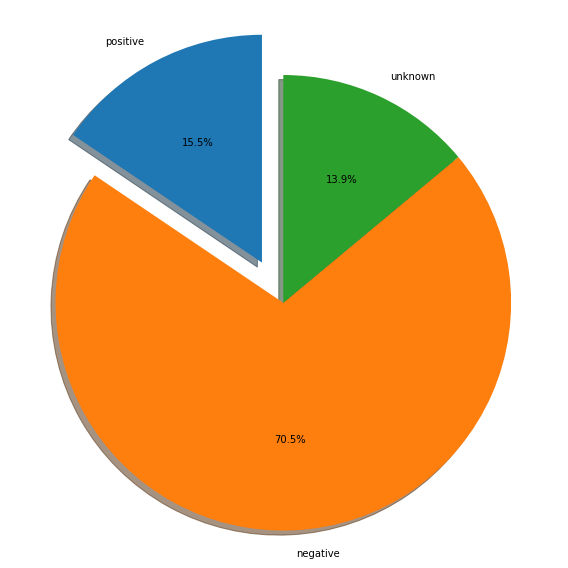

In [28]:
labels = ["positive", "negative", "unknown"]
positives = sum(train_test_corr["corr"] >= 0)
negatives = sum(train_test_corr["corr"] < 0)
unknowns = train_rows - positives - negatives
sizes = np.array([positives, negatives, unknowns])/train_rows

explode = (0.2, 0, 0)  
plt.figure(figsize = (8, 8))
plt.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.axis("equal")  
plt.tight_layout()
plt.show()

## Take a look on the new order with the training set

### First five

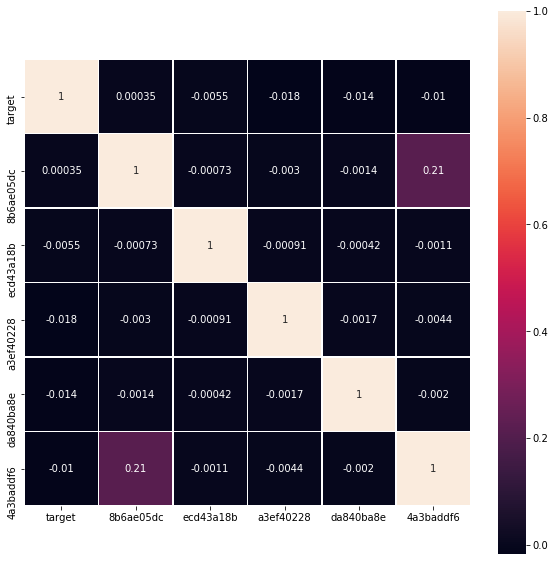

In [29]:
plt.figure(figsize = (10, 10))
sns.heatmap(train[["target"] + list(train_test_corr["features"][:5])].corr(), annot = True, square = True, linewidth = 0.5)
plt.show()

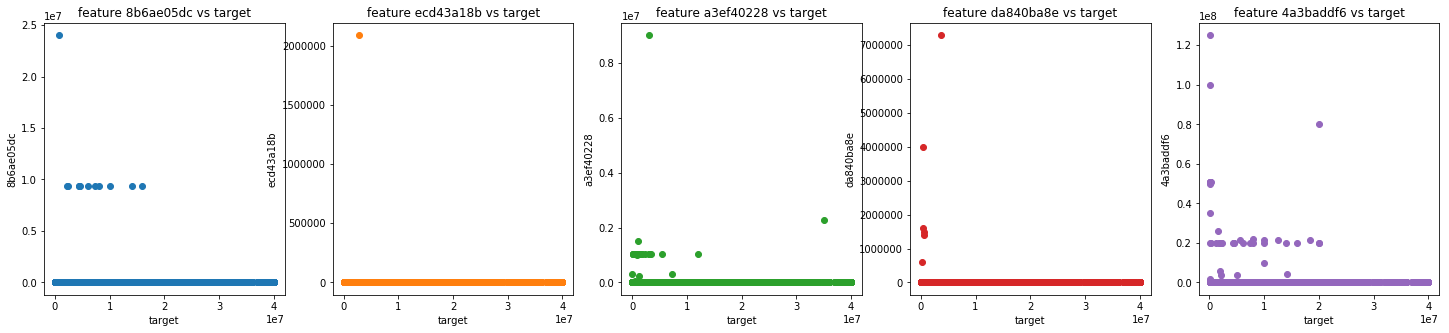

In [30]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i, f in enumerate(train_test_corr["features"][:5]):
    ax[i].scatter(train["target"], train[f], color = color[i])
    ax[i].set_xlabel("target")
    ax[i].set_ylabel(f)
    ax[i].set_title("feature " + f + " vs target")
plt.show()

### Last five

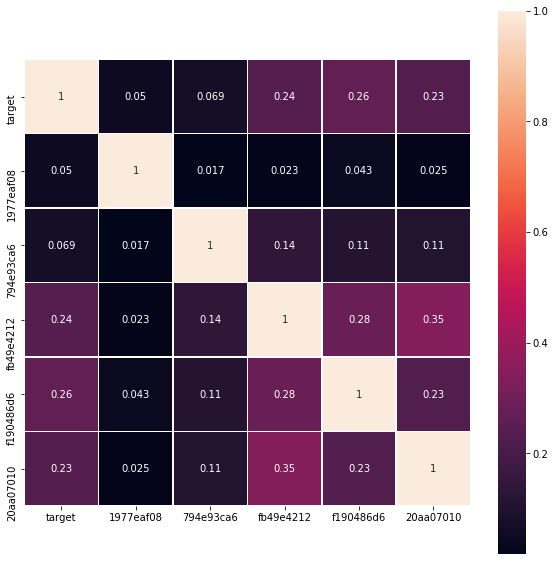

In [31]:
plt.figure(figsize = (10, 10))
sns.heatmap(train[["target"] + list(train_test_corr["features"][-5:])].corr(), annot = True, square = True, linewidth = 0.5)
plt.show()

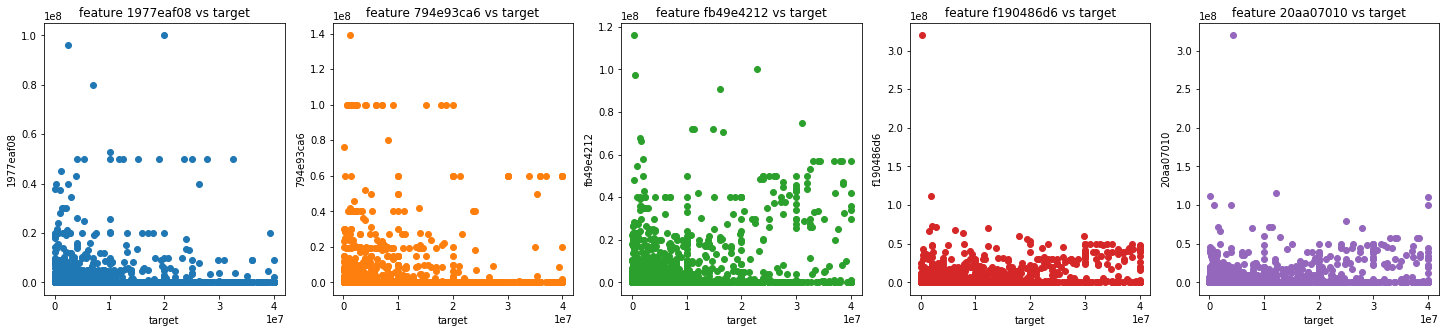

In [32]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i, f in enumerate(train_test_corr["features"][-5:]):
    ax[i].scatter(train["target"], train[f], color = color[i])
    ax[i].set_xlabel("target")
    ax[i].set_ylabel(f)
    ax[i].set_title("feature " + f + " vs target")
plt.show()

## zeros in train vs in partial test

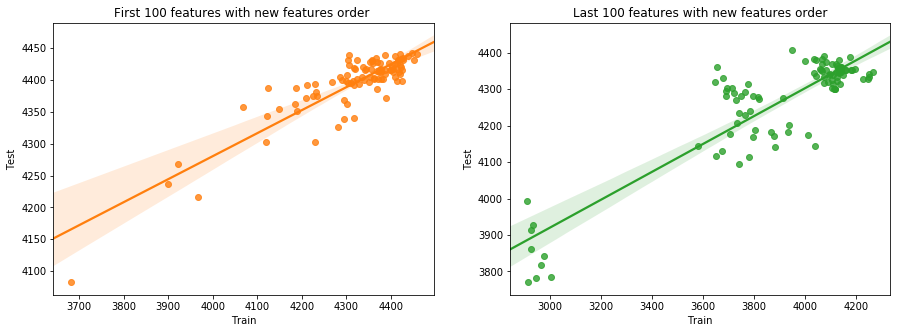

In [33]:
strong_feat = pd.DataFrame(([sum(train[c] == 0), sum(partial_test[c] == 0)] for c in train_test_corr["features"][:100]), columns = ["Train", "Test"])
weak_feat = pd.DataFrame(([sum(train[c] == 0), sum(partial_test[c] == 0)] for c in train_test_corr["features"][-100:]), columns = ["Train", "Test"])

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(strong_feat["Train"], strong_feat["Test"], color = color[1], ax = ax[0])
ax[0].set_xlabel("Train")
ax[0].set_ylabel("Test")
ax[0].set_title("First 100 features with new features order ")

sns.regplot(weak_feat["Train"], weak_feat["Test"], color = color[2], ax = ax[1])
ax[1].set_xlabel("Train")
ax[1].set_ylabel("Test")
ax[1].set_title("Last 100 features with new features order")
plt.show()

## simple models to evaluate features

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def rmsle(y, pred):
    return np.sqrt(np.mean(np.power(y - pred, 2)))

X_train, X_valid, Y_train, Y_valid = train_test_split(train.iloc[:, 2:], np.log1p(train["target"]), 
                                                      test_size = 0.2, random_state = 32)
forest_model = RandomForestRegressor(n_jobs = -1, random_state = 32)

### Original order features

In [35]:
forest_model.fit(X_train, Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid)))

1.4823801769475284


In [36]:
forest_model.fit(X_train[unique_num_in_feat[unique_num_in_feat["num_unique"] > 500]["feat"][2:]], Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid[unique_num_in_feat[unique_num_in_feat["num_unique"] > 500]["feat"][2:]])))

1.536870014320543


### Pearson correlation order features

#### Frst 100

In [37]:
forest_model.fit(X_train[pearson_corr["feature"][:100]], Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid[pearson_corr["feature"][:100]])))

1.5288732039850412


#### Last 100

In [38]:
forest_model.fit(X_train[pearson_corr["feature"][-100:]], Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid[pearson_corr["feature"][-100:]])))

1.762984627040042


### train, test Spearman correlation order features

#### First 100

In [39]:
forest_model.fit(X_train[train_test_corr["features"][:100]], Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid[train_test_corr["features"][:100]])))

1.71208947010678


#### Last 100

In [40]:
forest_model.fit(X_train[train_test_corr["features"][-100:]], Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid[train_test_corr["features"][-100:]])))

1.56426376295334


#### Used all negative spearman correlation features

In [41]:
forest_model.fit(X_train[train_test_corr["features"][-3144:]], Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid[train_test_corr["features"][-3144:]])))

1.522069036089213


In [42]:
new_train = train[train_test_corr["features"][-3144:]]

In [43]:
columns_with_one_val = new_train.columns[new_train.nunique() == 1]
columns_with_one_val

Index([], dtype='object')

In [44]:
new_columns = new_train.columns
colsToRemove = []
for i in range(len(new_columns) - 1):
    v = new_train[new_columns[i]].values
    for j in range(i + 1, len(new_columns)):
        if np.array_equal(v, new_train[new_columns[j]].values):
            colsToRemove.append(new_columns[j])
print(len(colsToRemove))

1


In [45]:
new_train.drop(colsToRemove, axis = 1, inplace = True)
X_train, X_valid, Y_train, Y_valid = train_test_split(new_train, np.log1p(train["target"]), 
                                                      test_size = 0.2, random_state = 32)
forest_model.fit(X_train, Y_train)
print(rmsle(Y_valid, forest_model.predict(X_valid)))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


1.511748377117881


## Extra Findings

In [46]:
cols = train.columns[2:]
target_in_feat = pd.DataFrame(np.zeros((1, train.shape[1] - 2)), columns = cols)

for idx, val in enumerate(train["target"]):
    for c in cols:
        if train[c][idx] == val:
            target_in_feat[c] += 1
target_in_feat

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,50.0,9.0,1.0,0.0,0.0,6.0,3.0,3.0,1.0,10.0,2.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,13.0,3.0,0.0,4.0,1.0,0.0,47.0,13.0,0.0,...,0.0,0.0,3.0,3.0,0.0,2.0,5.0,8.0,1.0,3.0,18.0,4.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,4.0,0.0,3.0,10.0,0.0,0.0,8.0,7.0,4.0,22.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0


In [47]:
target_in_feat = target_in_feat.iloc[:, np.argsort(target_in_feat.loc[0])]
target_in_feat = target_in_feat.T.sort_values(by = [0], ascending = False)
target_in_feat[:15]

,0
f190486d6,81.0
58e2e02e6,67.0
eeb9cd3aa,65.0
9fd594eec,61.0
6eef030c1,60.0
58e056e12,55.0
20aa07010,50.0
62e59a501,49.0
c5a231d81,49.0
15ace8c9f,47.0


In [48]:
target_in_feat[target_in_feat[0] >= 30]

,0
f190486d6,81.0
58e2e02e6,67.0
eeb9cd3aa,65.0
9fd594eec,61.0
6eef030c1,60.0
58e056e12,55.0
20aa07010,50.0
62e59a501,49.0
c5a231d81,49.0
15ace8c9f,47.0


In [49]:
train[["ID", "target"] + list(target_in_feat[target_in_feat[0] >= 30].index)].head(20)

,ID,target,f190486d6,58e2e02e6,eeb9cd3aa,9fd594eec,6eef030c1,58e056e12,20aa07010,62e59a501,c5a231d81,15ace8c9f,87ffda550,d6bb78916,fb0f5dbfe,0ff32eb98,2ec5b290f,963a49cdc,024c577b9,0572565c2,c47340d97,66ace2992,58232a6fb,5c6487af1,324921c7b,63c094ba4,703885424,91f701ba2,f74e8f13d,e176a204a,190db8488,d5fa73ead,1702b5bf0,2e103d632,adb64ff71,23310aa6f,df838756c,fb49e4212,1931ccfdd,6619d81fc,1c71183bb,26fc93eb7,241f0f867,fc99f9426,b43a7cfd5,44d5b820f,70feb1494,491b9ee45,6c5c8869c,122c135ed,f6eba969e,6df033973,8e4d0fe45,1fe5d56b9,4bcf15776
0,000d6aaf2,38000000.0,1866666.66,12066666.66,700000.0,600000.0,900000.0,0.0,0.0,0.0,0.0,4100000.0,1300000.0,0.0,0.0,0.00,0.0,13200000.0,0.0,400000.0,0.0,0.0,28000000.0,0.0,6050000.00,7100000.0,0.0,5000000.0,1733333.34,0.0,0.0,0.0,0.00,700000.0,0.0,0.0,0.0,0.0,2000000.0,400000.0,600000.0,3205000.0,950000.0,0.0,0.0,0.0,1200000.0,0.0,0.0,28000000.0,0.0,0.0,0.00,0.0,0.0
1,000fbd867,600000.0,0.00,2850000.00,2225000.0,1800000.0,800000.0,3300000.0,2200000.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,16000000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133333.34,0.0,0.0
2,0027d6b71,10000000.0,0.00,0.00,0.0,0.0,0.0,6000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,12000000.0,0.0,0.0,0.0,5500000.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0028cbf45,2000000.0,2000000.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,002a68644,14400000.0,0.00,0.00,0.0,0.0,37662000.0,6700000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.00,1180000.0,0.0,5400000.0,0.0,8000000.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,002dbeb22,2800000.0,0.00,0.00,2800000.0,17000000.0,0.0,0.0,17020000.0,17020000.0,17020000.0,556000.0,0.0,17020000.0,0.0,17020000.00,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.00,0.0,17020000.0,17020000.0,17020000.00,17020000.0,17020000.0,0.0,17020000.00,0.0,17020000.0,17020000.0,0.0,17020000.0,17020000.0,17020000.0,17000000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,0.0,20000000.0,0.00,17020000.0,17020000.0
6,003925ac6,164000.0,10000.00,4000.00,0.0,30000.0,0.0,4000.0,0.0,0.0,360000.0,0.0,0.0,0.0,0.0,18000.00,16000.0,2000.0,2000.0,0.0,15000.0,10000.0,12000.0,11000.0,33000.00,0.0,0.0,14000.0,0.00,0.0,22000.0,0.0,0.00,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.00,0.0,0.0
7,003eb0261,600000.0,0.00,0.00,0.0,65000000.0,0.0,0.0,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000000.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
8,004b92275,979000.0,3333333.34,3925333.34,4000000.0,0.0,0.0,58000.0,58000.0,58000.0,58000.0,0.0,0.0,58000.0,58000.0,58000.00,58000.0,58000.0,58000.0,58000.0,58000.0,58000.0,58000.0,58000.0,58000.00,0.0,58000.0,58000.0,58000.00,58000.0,58000.0,0.0,58000.00,0.0,58000.0,58000.0,0.0,58000.0,58000.0,58000.0,0.0,58000.0,58000.0,58000.0,58000.0,0.0,58000.0,58000.0,0.0,0.0,0.0,4000000.0,5543000.00,0.0,0.0
9,0067b4fef,460000.0,7500000.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


### number of nonzero in each row

In [50]:
row_counts = {}
for row in range(train.shape[0]):
    row_counts[sum(train.iloc[row, 2:] != 0)] = row
print(sorted(row_counts))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

### number of nonzero in each row

In [51]:
col_counts = {}
for col in train.columns[2:]:
    col_counts[sum(train[col] != 0)] = col
print(sorted(col_counts))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [52]:
new_col_order = [col_counts[key] for key in sorted(col_counts)]
new_train = train[new_col_order]
new_train.head(20)

,e29d22b59,f677d4d13,f6f15ffa5,de471ea65,98dea9e42,41d1e5f8f,ba4a02efc,9d9e518a3,a380d5301,8f55955dc,6249d8488,afc08501b,533e43257,88458cb21,5f7d60408,e926d89d3,2e5424c98,969caa87a,137efaa80,f40da20f4,df443d0ce,c5e748f6a,fe919be32,31e434a58,73a8a4d75,a05f1bb14,88263a031,defcc2c50,4adae02ea,c0f5174c7,5964f1856,ab7764ead,d45fd5508,2a1f6c7f9,fb36b89d9,71b203550,46ee7f2c8,7df9efba5,066566b35,831a9e087,...,a09a238d0,ca2b906e8,9de83dc23,f97d9431e,f02ecb19c,166008929,11e12dbe8,024c577b9,d6bb78916,b43a7cfd5,6eef030c1,241f0f867,58e056e12,963a49cdc,62e59a501,fb49e4212,15ace8c9f,26fc93eb7,f74e8f13d,fb0f5dbfe,1702b5bf0,324921c7b,1931ccfdd,eeb9cd3aa,703885424,fc99f9426,9fd594eec,66ace2992,491b9ee45,1db387535,190db8488,23310aa6f,6619d81fc,e176a204a,5c6487af1,f190486d6,adb64ff71,c47340d97,91f701ba2,c5a231d81
0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,400000.0,0.0,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,900000.0,950000.0,0.0,13200000.0,0.0,0.0,4100000.0,3205000.0,1733333.34,0.0,0.00,6050000.00,2000000.0,700000.0,0.0,0.0,600000.0,0.0,0.0,0.0,0.0,0.0,400000.0,0.0,0.0,1866666.66,0.0,0.0,5000000.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,800000.0,0.0,3300000.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,16000000.00,7000000.00,0.0,2225000.0,0.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000000.0,12000000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,600000,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.00,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5400000.0,0.0,0.0,37662000.0,0.0,6700000.0,0.0,0.0,0.0,0.0,0.0,0.00,4000000.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,8000000.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,12000,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,17000000,0,...,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,0.0,17020000.0,0.0,17020000.0,17020000.0,17020000.0,556000.0,17020000.0,17020000.00,0.0,17020000.00,17020000.00,17020000.0,2800000.0,17020000.0,17020000.0,17000000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,17020000.0,0.00,17020000.0,17020000.0,17020000.0,17020000.0
6,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,40000,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,41842000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,4000.0,0.0,0.0,4000.0,2000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,33000.00,0.0,0.0,0.0,0.0,30000.0,10000.0,0.0,6000.0,22000.0,0.0,0.0,0.0,11000.0,10000.00,6000.0,15000.0,14000.0,360000.0
7,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960000.0,0.0,0.0,0.0,0.0,10000000.0,0.0,0.0,0.0,0.00,0.0,0.00,20000000.00,0.0,0.0,0.0,0.0,65000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,22000,0,0,0,0.0,0,0,0,22000,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58000.0,58000.0,58000.0,0.0,58000.0,58000.0,58000.0,58000.0,58000.0,0.0,58000.0,58000.00,58000.0,58000.00,58000.00,58000.0,4000000.0,58000.0,58000.0,0.0,58000.0,58000.0,58000.0,58000.0,58000.0,58000.0,58000.0,58000.0,3333333.34,58000.0,58000.0,58000.0,58000.0
9,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [53]:
new_row_order = [row_counts[key] for key in sorted(row_counts)]
new_train = train.iloc[new_row_order]
new_train.head(20)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
4402,fbfdf99e1,300000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4453,ff7cdeb16,4000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,4000000.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4394,fb741ee56,500000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4333,f7e341c36,500000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4452,ff7be29d2,400000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4324,f7547a60d,14000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4409,fc5681277,1790000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4416,fd1c66b56,360000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4392,fb60fb504,1800000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4449,ff3d0e888,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [54]:
new_train = new_train[["ID", "target"] + new_col_order]
new_train.head(20)

,ID,target,e29d22b59,f677d4d13,f6f15ffa5,de471ea65,98dea9e42,41d1e5f8f,ba4a02efc,9d9e518a3,a380d5301,8f55955dc,6249d8488,afc08501b,533e43257,88458cb21,5f7d60408,e926d89d3,2e5424c98,969caa87a,137efaa80,f40da20f4,df443d0ce,c5e748f6a,fe919be32,31e434a58,73a8a4d75,a05f1bb14,88263a031,defcc2c50,4adae02ea,c0f5174c7,5964f1856,ab7764ead,d45fd5508,2a1f6c7f9,fb36b89d9,71b203550,46ee7f2c8,7df9efba5,...,a09a238d0,ca2b906e8,9de83dc23,f97d9431e,f02ecb19c,166008929,11e12dbe8,024c577b9,d6bb78916,b43a7cfd5,6eef030c1,241f0f867,58e056e12,963a49cdc,62e59a501,fb49e4212,15ace8c9f,26fc93eb7,f74e8f13d,fb0f5dbfe,1702b5bf0,324921c7b,1931ccfdd,eeb9cd3aa,703885424,fc99f9426,9fd594eec,66ace2992,491b9ee45,1db387535,190db8488,23310aa6f,6619d81fc,e176a204a,5c6487af1,f190486d6,adb64ff71,c47340d97,91f701ba2,c5a231d81
4402,fbfdf99e1,300000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,ff7cdeb16,4000000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0
4394,fb741ee56,500000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4333,f7e341c36,500000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4452,ff7be29d2,400000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3400000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4324,f7547a60d,14000000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4409,fc5681277,1790000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4416,fd1c66b56,360000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,fb60fb504,1800000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4449,ff3d0e888,10000000.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
new_train.tail(20)

,ID,target,e29d22b59,f677d4d13,f6f15ffa5,de471ea65,98dea9e42,41d1e5f8f,ba4a02efc,9d9e518a3,a380d5301,8f55955dc,6249d8488,afc08501b,533e43257,88458cb21,5f7d60408,e926d89d3,2e5424c98,969caa87a,137efaa80,f40da20f4,df443d0ce,c5e748f6a,fe919be32,31e434a58,73a8a4d75,a05f1bb14,88263a031,defcc2c50,4adae02ea,c0f5174c7,5964f1856,ab7764ead,d45fd5508,2a1f6c7f9,fb36b89d9,71b203550,46ee7f2c8,7df9efba5,...,a09a238d0,ca2b906e8,9de83dc23,f97d9431e,f02ecb19c,166008929,11e12dbe8,024c577b9,d6bb78916,b43a7cfd5,6eef030c1,241f0f867,58e056e12,963a49cdc,62e59a501,fb49e4212,15ace8c9f,26fc93eb7,f74e8f13d,fb0f5dbfe,1702b5bf0,324921c7b,1931ccfdd,eeb9cd3aa,703885424,fc99f9426,9fd594eec,66ace2992,491b9ee45,1db387535,190db8488,23310aa6f,6619d81fc,e176a204a,5c6487af1,f190486d6,adb64ff71,c47340d97,91f701ba2,c5a231d81
4414,fd0c7cfc2,1359000.00,0,0,0,0,1220000,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,220000,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,3147200.00,466461.54,1600000.00,310000.00,296444.44,1586888.88,1563411.76,550000.00,834800.00,0.00,1563411.76,540000.00,1477600.00,440000.00,3076666.66,1563411.76,160000.00,1563411.76,1563411.76,3513333.34,115636.36,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1015000.00,280000.00,1563411.76,1563411.76,1563411.76,1563411.76
2366,8adafbb52,5450500.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,466461.54,1600000.00,0.00,0.00,834800.00,75000.00,1563411.76,247166.66,115636.36,1477600.00,1563411.76,1015000.00,1586888.88,3076666.66,550000.00,1563411.76,3513333.34,1563411.76,1563411.76,310000.00,540000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,2352551.72,1563411.76,1563411.76,1563411.76,1563411.76
2971,ad960f947,280000.00,0,0,0,0,0,0,0,0,0,0,0,4526666.68,0,0,0,0,0,0,790000,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1600000.00,0.00,440000.00,1477600.00,115636.36,3147200.00,1563411.76,296444.44,540000.00,1586888.88,1563411.76,1563411.76,75000.00,550000.00,247166.66,1563411.76,310000.00,1563411.76,1563411.76,0.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,160000.00,1563411.76,1563411.76,1563411.76,1563411.76
378,16a02e67a,2352551.72,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0,252000,0,0,0.0,0,0,0,0,0,0,0,0,0,...,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,0.00,440000.00,3076666.66,1586888.88,540000.00,466461.54,1563411.76,834800.00,1015000.00,75000.00,1563411.76,1563411.76,3147200.00,247166.66,296444.44,1563411.76,0.00,1563411.76,1563411.76,1477600.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,3513333.34,1563411.76,1563411.76,1563411.76,1563411.76
3492,c95732596,160000.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,440000.00,3076666.66,550000.00,75000.00,1015000.00,1600000.00,1563411.76,115636.36,1563411.76,3147200.00,1563411.76,1563411.76,466461.54,296444.44,834800.00,1563411.76,1477600.00,1563411.76,1563411.76,1586888.88,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,310000.00,1563411.76,1563411.76,1563411.76,1563411.76
2071,7862786dc,3513333.34,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,178000,0,0,0,0,0,0,0,0,...,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,1775333.34,3076666.66,550000.00,247166.66,3147200.00,1563411.76,0.00,1563411.76,540000.00,1563411.76,466461.54,1563411.76,1563411.76,1600000.00,834800.00,115636.36,1563411.76,1586888.88,1563411.76,1563411.76,75000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,0.00,1563411.76